In [1]:
# Import the modules required
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Take the Data

In [2]:
df=pd.read_csv('/content/Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# The id column cannot be used to predict the model and  hence we can drop it 
df.drop('Id',axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Analyzing Data

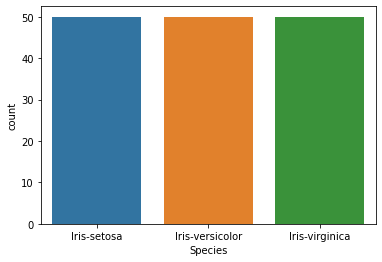

In [5]:
sns.countplot(x='Species',data=df)

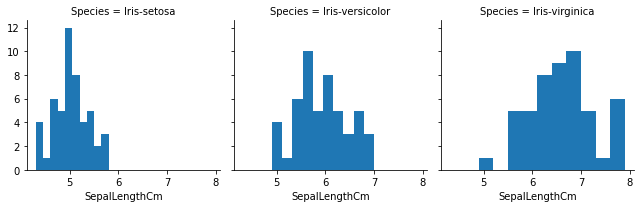

In [6]:
b=sns.FacetGrid(df,col='Species')
b.map(plt.hist,'SepalLengthCm')

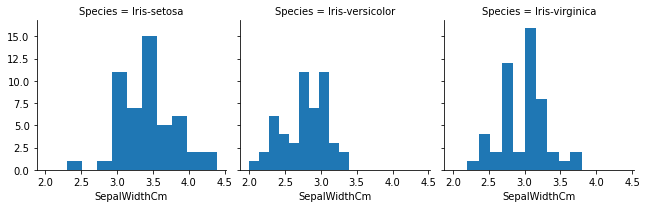

In [7]:
b=sns.FacetGrid(df,col='Species')
b.map(plt.hist,'SepalWidthCm')

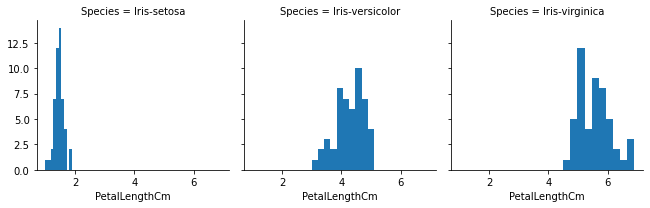

In [8]:
b=sns.FacetGrid(df,col='Species')
b.map(plt.hist,'PetalLengthCm')

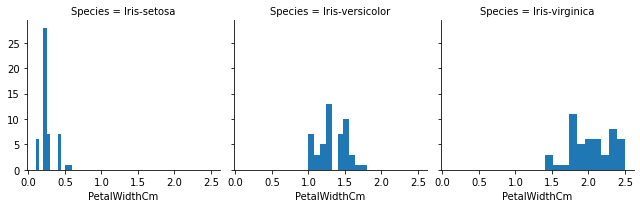

In [9]:
b=sns.FacetGrid(df,col='Species')
b.map(plt.hist,'PetalWidthCm')

# K-Nearest Neighbors Algorithm 

# Divide into Input and Output

In [10]:
x=df.iloc[:,0:4].values
y=df.iloc[:,4].values

# Train and Test variables 

In [11]:
from sklearn.model_selection import train_test_split
knn_x_train,knn_x_test,knn_y_train,knn_y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
knn_x_test.shape

(30, 4)

In [13]:
knn_y_test.shape

(30,)

# Run a Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# create an instance of the classifier 
knn=KNeighborsClassifier()

# Fit the Model

In [16]:
knn.fit(knn_x_train,knn_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn_pred_y=knn.predict(knn_x_test)

In [18]:
knn_pred_y.shape

(30,)

In [19]:
knn_y_test.shape

(30,)

In [20]:
from sklearn import metrics

# Accuracy

In [21]:
metrics.accuracy_score(knn_y_test,knn_pred_y)

0.9666666666666667

# Confusion Matrix

In [22]:
metrics.confusion_matrix(knn_y_test,knn_pred_y)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

# Predict the output 

In [23]:
knn.predict([[1,1,1,1]])

array(['Iris-setosa'], dtype=object)

In [24]:
# changing the number of neighbors and metric to the Euclidean 

In [25]:

knn2=KNeighborsClassifier(n_neighbors=11,metric='euclidean')

In [26]:
knn2.fit(knn_x_train,knn_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [27]:
knn2_y_pred=knn2.predict(knn_x_test)

In [28]:
metrics.accuracy_score(knn_y_test,knn2_y_pred)

1.0

In [29]:
metrics.confusion_matrix(knn_y_test,knn2_y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

# Decision Tree Algorithm 

In [30]:
df2=pd.get_dummies(df,drop_first=True)
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


# Divide Into Input and Output 

In [31]:
dtc_x=df2.iloc[:,0:-2].values
dtc_y=df2.iloc[:,-2:].values

# Train and Test Variables 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
dtc_x_train,dtc_x_test,dtc_y_train,dtc_y_test=train_test_split(dtc_x,dtc_y,test_size=0.2,random_state=0)

In [34]:
dtc_x_train.shape

(120, 4)

In [35]:
dtc_y_test.shape

(30, 2)

# Run a Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc=DecisionTreeClassifier(random_state=0)
# create an instance of the classifier

# Fit the Model 

In [38]:
dtc.fit(dtc_x_train,dtc_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [39]:
dtc_pred_y=dtc.predict(dtc_x_test)

# Accuracy 

In [40]:
metrics.accuracy_score(dtc_y_test,dtc_pred_y)

1.0

# Predict the Output

In [41]:
dtc.predict([[1,1,1,1]])

array([[0, 0]], dtype=uint8)

In [42]:
# here it means Iris - setosa 

# Multilabel Confusion Matrix

In [43]:
metrics.multilabel_confusion_matrix(dtc_y_test,dtc_pred_y)

array([[[17,  0],
        [ 0, 13]],

       [[24,  0],
        [ 0,  6]]])